`63070501061 S.RAKNA`

> 40 points, 4 hr.

# RNN (Recurrent Neural Network)

- Using a Recurrent Neural Network of your choice, 
- create a predictor for the next time frame. 
- Show how well your training fit actually meets the data. 
- What is your prediction error on the test set?

<u>Example:</u>
<ul>
  <li><b>Recurrent Neural Network Model</b>: plain RNN, LSTM, or other RNN</li>
  <li><b>Timeframe</b>: Daily, hourly, per minute, or ...</li>
  <li>
    <b>Datasets</b>:
    <ul>
      <li>Commodity Dataset: SET index, Price of PTT Stock, USD Exchange, Gold, ...</li>
      <li>Train/Test Dataset: MSFT stock, Kaggle Currency, ...</li>
    </ul>
  </li>
</ul>

<h3 style="color:red;">My Predictor</h3>
<ul>
  <li><b>Recurrent Neural Network Model</b>: LSTM</li>
  <li><b>Timeframe</b>: Daily</li>
  <li>
    <b>Dataset</b>:
    <a href="https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021">APPLE Stock Data</a>
  </li>
</ul>
<a 
href="https://www.kaggle.com/code/stpeteishii/apple-stock-price-prediction-lstm#dataset_train"
>
<span style="color:orange;">
Link to main Notebook for understanding LSTM with this dataset
</span>
<br/>
Improvement of this notebook: model architecture and optimizer
</a>

In [23]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
AAPL = pd.read_csv('./AAPL.csv')
print(len(AAPL))

10409


In [25]:
# Date to datetime
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10409 non-null  datetime64[ns]
 1   Open       10409 non-null  float64       
 2   High       10409 non-null  float64       
 3   Low        10409 non-null  float64       
 4   Close      10409 non-null  float64       
 5   Adj Close  10409 non-null  float64       
 6   Volume     10409 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 569.4 KB


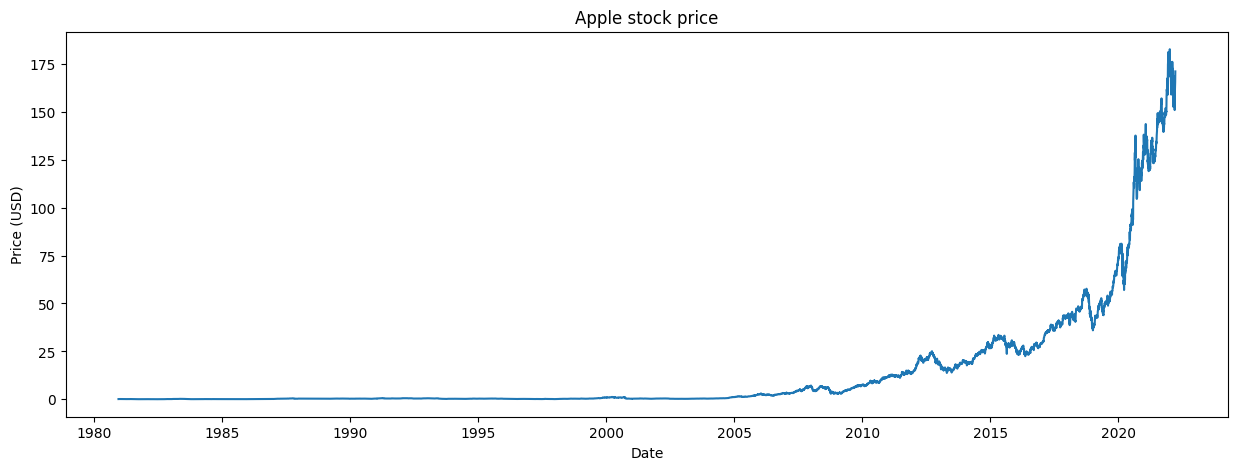

In [26]:
# Plot time series, OPEN 
plt.figure(figsize=(15, 5))
plt.plot(AAPL['Date'], AAPL['Open'])
plt.title('Apple stock price')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

In [27]:
#  Split
dataset_train=AAPL.iloc[10000:-100]
dataset_test=AAPL.iloc[-100:]

### Train

In [28]:
trainset = dataset_train.iloc[:,1:2].values #OPEN
display(trainset[0:5])

array([[111.970001],
       [110.497498],
       [114.43    ],
       [114.830002],
       [116.0625  ]])

In [29]:
# MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))


[[0.14168575]
 [0.11360598]
 [0.18859649]
 [0.19622429]
 [0.21972731]]
309


In [30]:
x_train = []
y_train = []

In [31]:
for i in range(60, len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0]) # data during the past 60 days.
    y_train.append(training_scaled[i, 0]) # the day after the last day of x_train
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)

(249, 60) (249,)


In [32]:
# (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('(samples, time steps, features) =', x_train.shape)


(samples, time steps, features) = (249, 60, 1)


In [33]:
# LSTM model

model = Sequential()

model.add(LSTM(
    units=100,
    return_sequences=True,
    input_shape=(x_train.shape[1], 1),
    activation='tanh')
)
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))

model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.4))

model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.5))

model.add(LSTM(units=100, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_7 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 100)          

In [34]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(x_train, y_train, epochs=300, batch_size=32)


Epoch 1/300
8/8 [==============================] - 5s 91ms/step - loss: 0.1681
Epoch 2/300
8/8 [==============================] - 1s 91ms/step - loss: 0.0693
Epoch 3/300
8/8 [==============================] - 1s 96ms/step - loss: 0.0563
Epoch 4/300
8/8 [==============================] - 1s 97ms/step - loss: 0.0465
Epoch 5/300
8/8 [==============================] - 1s 109ms/step - loss: 0.0442
Epoch 6/300
8/8 [==============================] - 1s 103ms/step - loss: 0.0390
Epoch 7/300
8/8 [==============================] - 1s 107ms/step - loss: 0.0356
Epoch 8/300
8/8 [==============================] - 1s 101ms/step - loss: 0.0348
Epoch 9/300
8/8 [==============================] - 1s 102ms/step - loss: 0.0386
Epoch 10/300
8/8 [==============================] - 1s 99ms/step - loss: 0.0393
Epoch 11/300
8/8 [==============================] - 1s 100ms/step - loss: 0.0315
Epoch 12/300
8/8 [==============================] - 1s 105ms/step - loss: 0.0319
Epoch 13/300
8/8 [========================

### Test

In [35]:
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat(
    (
        dataset_train['Open'],
        dataset_test['Open']
    ),
    axis=0
)

<p style="color:red; font-size:18px;">Inputs data is the last 60 data of train data plus true test data</p>

In [36]:
print(len(dataset_total), len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)


409 100
(160,)


In [37]:
'''
In the context of a LSTM model, 
this reshaping may be necessary if the input data has only one feature (i.e., one time series) 
and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). 
In this case, since there is only one feature, the shape does not change.
'''
inputs = inputs.reshape(-1, 1) # type: ignore
print(inputs.shape)

inputs = sc.transform(inputs)
print(inputs.shape)


(160, 1)
(160, 1)


In [38]:
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)


(100, 60)
(100, 60, 1)


In [39]:
predicted_price = model.predict(x_test)

4/4 [==============================] - 1s 21ms/step


In [40]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)


(100, 1)


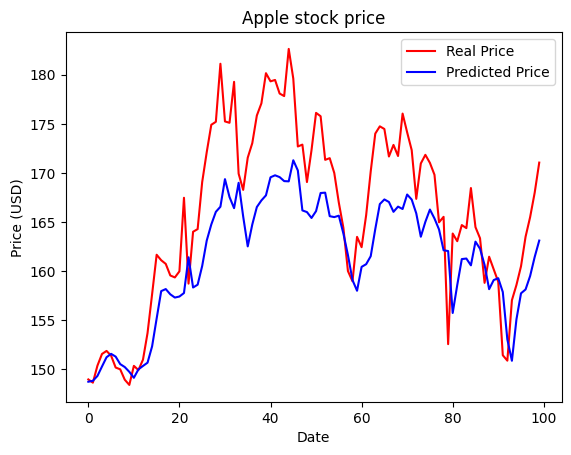

In [41]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Apple stock price')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()


<p style="color:red; font-size:18px;">
Inputs data is the last 60 data of train data only (not use true test data)
</p>

In [42]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price = []
for i in range(100):
    x = np.reshape(inputs, (1, 60, 1))
    pred = model.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price += [pred.reshape(-1)]

1/1 [==============================] - 0s 12ms/step


In [43]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)


(100, 1)


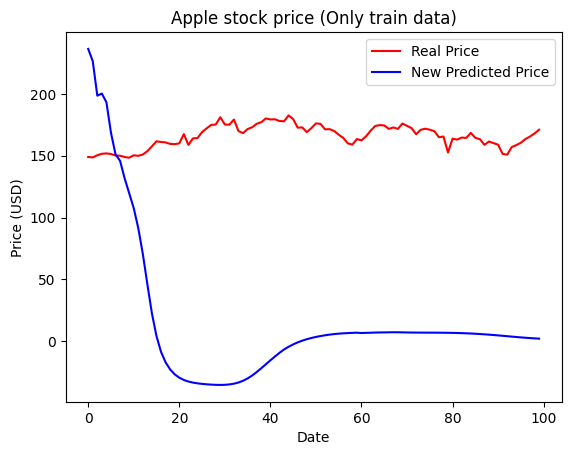

In [44]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(new_predicted_price, color='blue', label='New Predicted Price')
plt.title('Apple stock price (Only train data)')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()
